# Proyek Analisis Data: Nama dataset
- Nama: Yeremia Yosefan Pane    
- Email: yeremiayosefanpane@hotmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Pada saat kapan bike sharing sering digunakan?
- Siapa user yang paling banyak melakukan transaksi bike sharing? 
- Bagaimana tingkat penggunaan bike sharing selama periode 2011 - 2012?
- Apakah ada korelasi antara penggunaan bike sharing dengan variabel seperti temperatur, cuaca, kecepatan angin, dll?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('./Datasets/day.csv')
df_hour = pd.read_csv('./Datasets/hour.csv')

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Menampilkan informasi dari dataset

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Mengubah tipe dataset kedalam bentuk yang benar

In [7]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [8]:
df_day['day_name'] = df_day['dteday'].dt.day_name()    

In [9]:
df_day['cat_weeks'] = 'Workday'
df_day.loc[df_day['day_name'].isin(['Saturday', 'Sunday']), 'cat_weeks'] = 'Weekend'

In [10]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_name,cat_weeks
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Weekend
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Weekend
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Workday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Workday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Workday


In [11]:
# Buat fungsi untuk mengonversi jam menjadi kategori
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Day'
    else:
        return 'Afternoon'

# Menerapkan fungsi kategorisasi ke kolom jam
df_hour['time_category'] = df_hour['hr'].apply(categorize_time)

In [16]:
df_hour['day_name'] = df_hour['dteday'].dt.day_name()    
df_hour['cat_weeks'] = 'Workday'
df_hour.loc[df_hour['day_name'].isin(['Saturday', 'Sunday']), 'cat_weeks'] = 'Weekend'

In [17]:
df_hour['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

In [18]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_category,day_name,cat_weeks
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Night,Saturday,Weekend
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Night,Saturday,Weekend
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Night,Saturday,Weekend
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Night,Saturday,Weekend
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Night,Saturday,Weekend


### Cleaning Data

In [19]:
drp_col = ['instant','season']
dt_set = [df_day, df_hour]
for rm in drp_col:
    for j in dt_set:
        j.drop([rm], axis=1, inplace=True)

### Melakukan pengecekan missing value pada data set

In [20]:
df_day.isnull().sum()

dteday        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
cat_weeks     0
dtype: int64

In [21]:
df_hour.isnull().sum()

dteday           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
casual           0
registered       0
cnt              0
time_category    0
day_name         0
cat_weeks        0
dtype: int64

### Melakukan pengecekan terhadap data duplicate

In [22]:
print(df_day.duplicated().sum())
print(df_hour.duplicated().sum())

0
0


### Pembersihan data outliers dengan menggunakan imputation

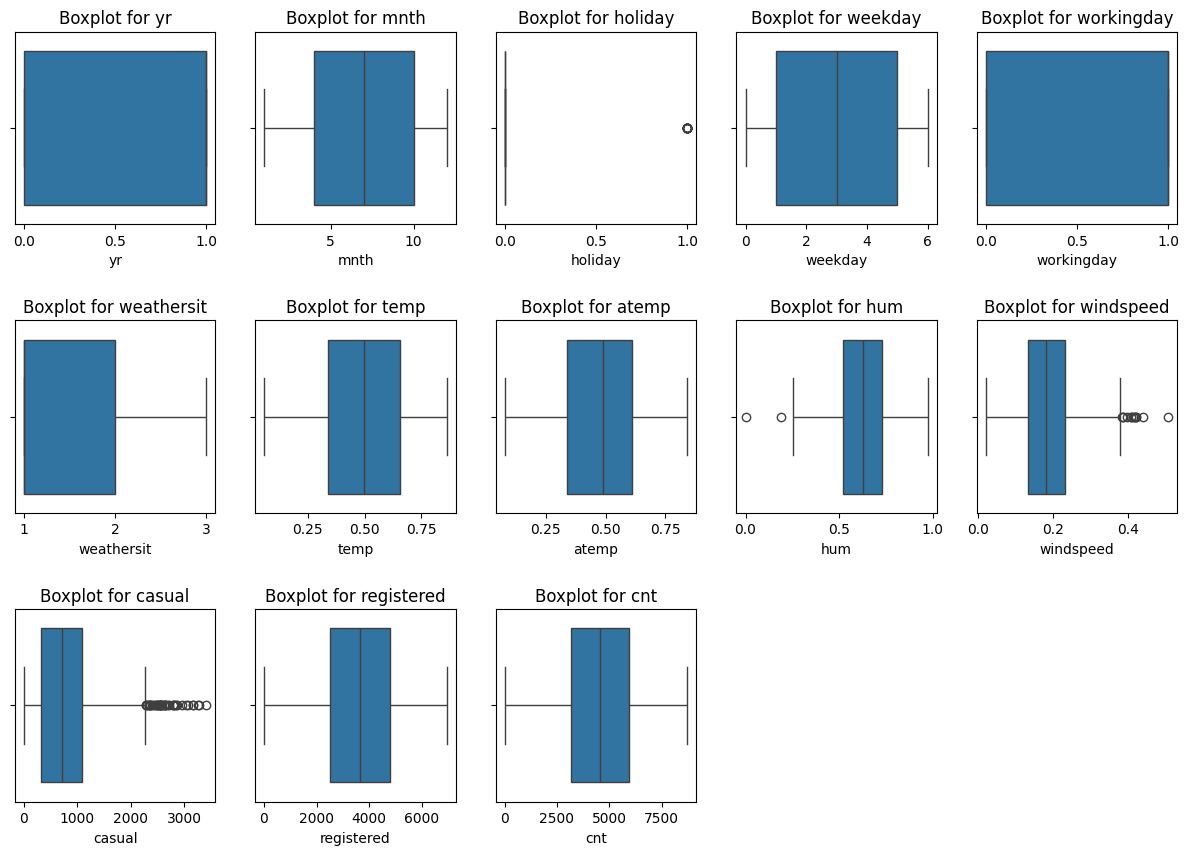

In [23]:
variables = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

rows = 3
cols = len(variables) // rows + (len(variables) % rows > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(variables):
    ax = axes[i // cols, i % cols]
    sns.boxplot(x=var, data=df_day, ax=ax)
    ax.set_title(f'Boxplot for {var}')

for i in range(len(variables), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

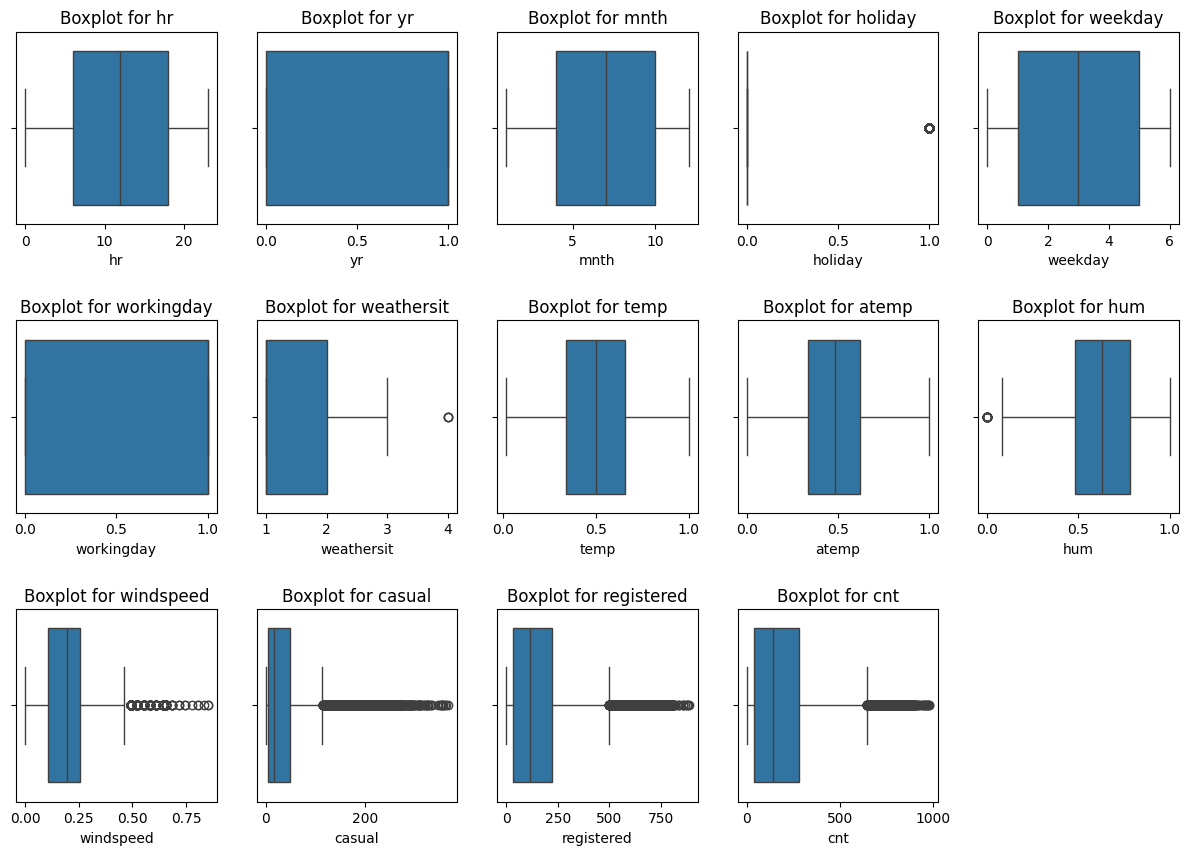

In [24]:
variables = ['hr','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

rows = 3
cols = len(variables) // rows + (len(variables) % rows > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(variables):
    ax = axes[i // cols, i % cols]
    sns.boxplot(x=var, data=df_hour, ax=ax)
    ax.set_title(f'Boxplot for {var}')

for i in range(len(variables), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [25]:
# Convert columns to numeric if needed
otl_col = ['windspeed', 'casual', 'registered','hum', 'cnt']
df_set = [df_day, df_hour]
for x in df_set:
    x['windspeed'] = pd.to_numeric(x['windspeed'], errors='coerce')
    x['casual'] = pd.to_numeric(x['casual'], errors='coerce')
    x['hum'] = pd.to_numeric(x['hum'], errors='coerce')
    x['cnt'] = pd.to_numeric(x['cnt'], errors='coerce')

for i in otl_col:
    for j in df_set:
        Q1 = j[i].quantile(0.25)
        Q3 = j[i].quantile(0.75)
        IQR = Q3 - Q1
        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)
        kondisi_lower_than = j[i] < minimum
        kondisi_more_than = j[i] > maximum
        j[i] = j[i].mask(cond=kondisi_more_than, other=maximum)
        j[i] = j[i].mask(cond=kondisi_lower_than, other=minimum)


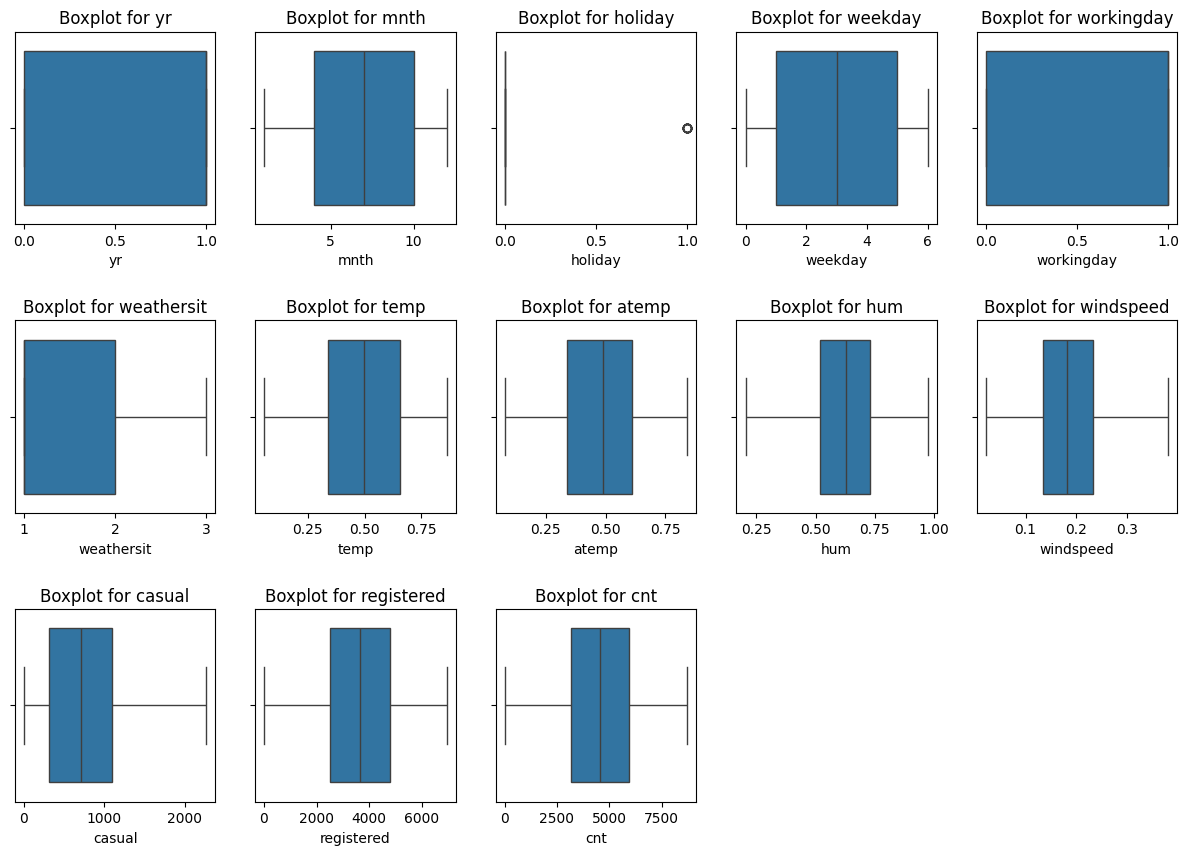

In [26]:
variables = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

rows = 3
cols = len(variables) // rows + (len(variables) % rows > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(variables):
    ax = axes[i // cols, i % cols]
    sns.boxplot(x=var, data=df_day, ax=ax)
    ax.set_title(f'Boxplot for {var}')

for i in range(len(variables), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

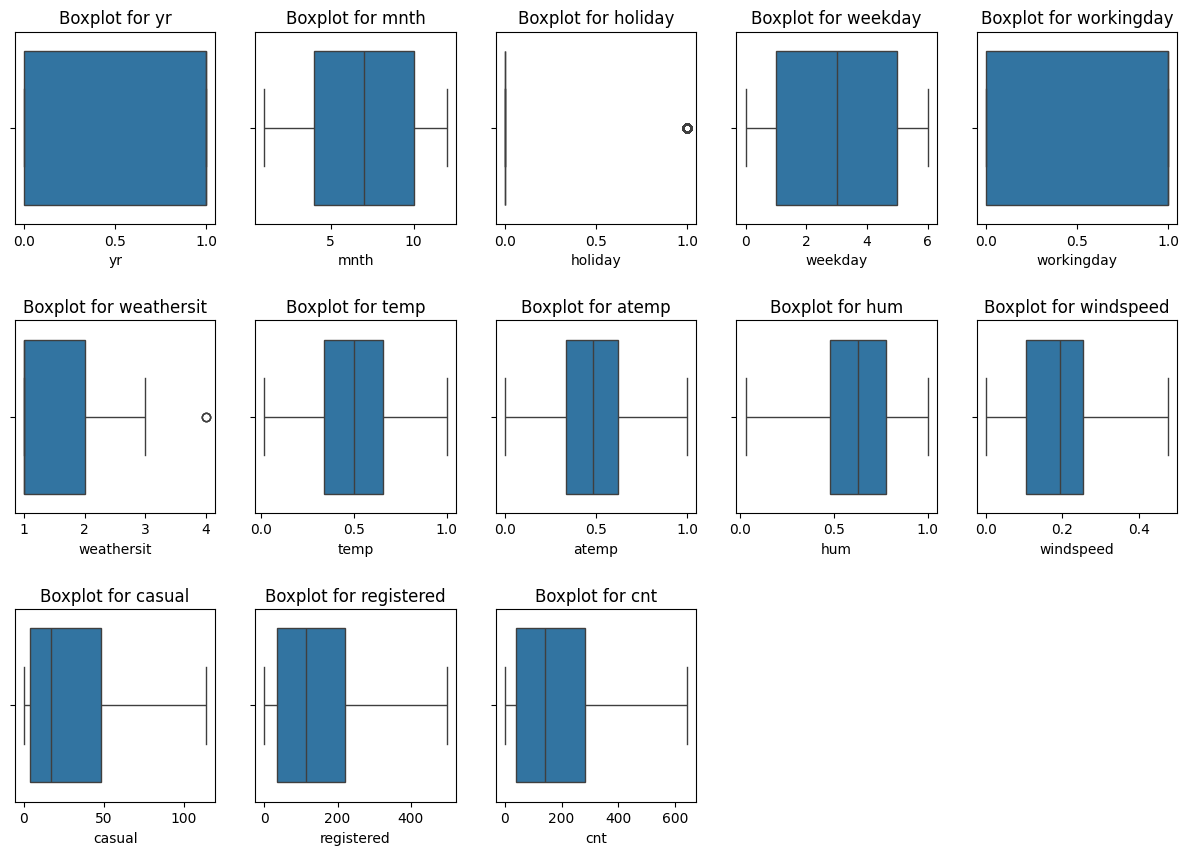

In [27]:
variables = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

rows = 3
cols = len(variables) // rows + (len(variables) % rows > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(variables):
    ax = axes[i // cols, i % cols]
    sns.boxplot(x=var, data=df_hour, ax=ax)
    ax.set_title(f'Boxplot for {var}')

for i in range(len(variables), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

## Exploratory Data Analysis (EDA)

### Explore Day Datasets

In [28]:
df_hour.describe()

,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627267,0.188691,31.158812,148.645204,186.361327
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000
std,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192809,0.118197,34.813147,135.351791,171.931168


In [29]:
df_day.describe()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628197,0.189846,824.388509,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.380611,2266.750000,6946.000000,8714.000000
std,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.141320,0.075644,623.642956,1560.256377,1937.211452


In [30]:

df_day.select_dtypes(include=np.number).corr()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.113667,-0.012669,0.241839,0.594248,0.566710
mnth,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.221711,-0.205847,0.137519,0.293488,0.279977
holiday,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.016431,0.007903,0.048136,-0.108745,-0.068348
weekday,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.051406,0.009991,0.046272,0.057367,0.067443
workingday,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.025627,-0.015650,-0.515158,0.303907,0.061156
weathersit,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.601407,0.044669,-0.258410,-0.260388,-0.297391
temp,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126722,-0.156916,0.573796,0.540012,0.627494
atemp,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139924,-0.182948,0.574245,0.544192,0.631066
hum,-0.113667,0.221711,-0.016431,-0.051406,0.025627,0.601407,0.126722,0.139924,1.000000,-0.241160,-0.075118,-0.095985,-0.105664
windspeed,-0.012669,-0.205847,0.007903,0.009991,-0.015650,0.044669,-0.156916,-0.182948,-0.241160,1.000000,-0.178155,-0.216927,-0.233657


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada saat kapan rental sepeda paling banyak digunakan?

In [31]:
result = df_day.groupby('cat_weeks')['cnt'].sum().reset_index()
result

,cat_weeks,cnt
0,Weekend,921834
1,Workday,2370845


In [32]:
result_day_name = df_day.groupby('day_name')['cnt'].sum().reset_index()
result_day_name

,day_name,cnt
0,Friday,487790
1,Monday,455503
2,Saturday,477807
3,Sunday,444027
4,Thursday,485395
5,Tuesday,469109
6,Wednesday,473048


In [33]:
result_time_category = df_hour.groupby('time_category')['cnt'].sum().reset_index()
result_time_category

,time_category,cnt
0,Afternoon,968117.5
1,Day,1265541.5
2,Morning,898605.5
3,Night,106509.0


### Pertanyaan 2: Siapa user yang paling banyak menggunakan rental sepeda? 

In [36]:
df_day[['casual', 'registered']].aggregate(['sum'])

,casual,registered
sum,602628.0,2672662


### Pertanyaan 3: Bagaimana tingkat penggunaan rental sepeda pada periode 2011 - 2012

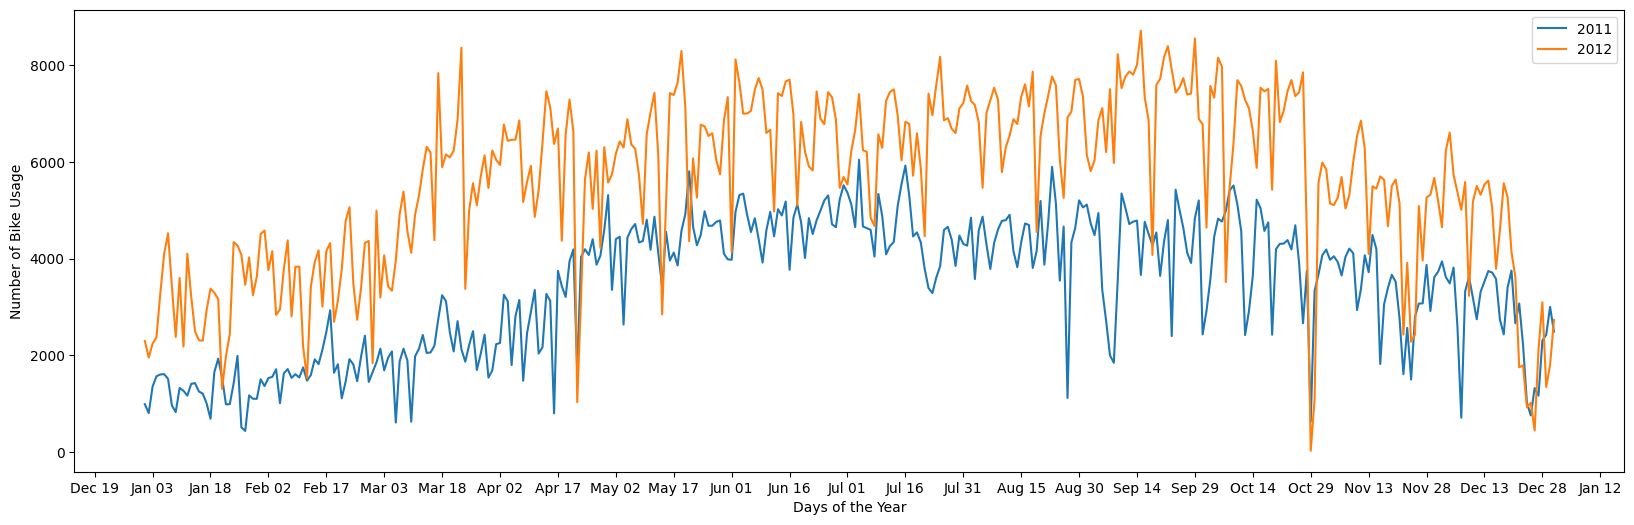

In [34]:
from matplotlib import dates
year_to_count_data = df_day[['dteday', 'cnt', 'yr']]
year_to_count_data = year_to_count_data.groupby(['dteday', 'yr']).sum().reset_index()
year_to_count_data['dteday'] = year_to_count_data['dteday'].map(lambda x: x.replace(year=2000))
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(year_to_count_data[year_to_count_data['yr']==0]['dteday'], year_to_count_data[year_to_count_data['yr']==0]['cnt']
        ,'-', label="2011")
ax.plot(year_to_count_data[year_to_count_data['yr']==1]['dteday'], year_to_count_data[year_to_count_data['yr']==1]['cnt']
        ,'-', label="2012")
ax.xaxis.set_major_locator(dates.DayLocator(interval=15))
month_day_fmt = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(month_day_fmt)
plt.xlabel("Days of the Year")
plt.ylabel("Number of Bike Usage")
plt.legend()
plt.show()

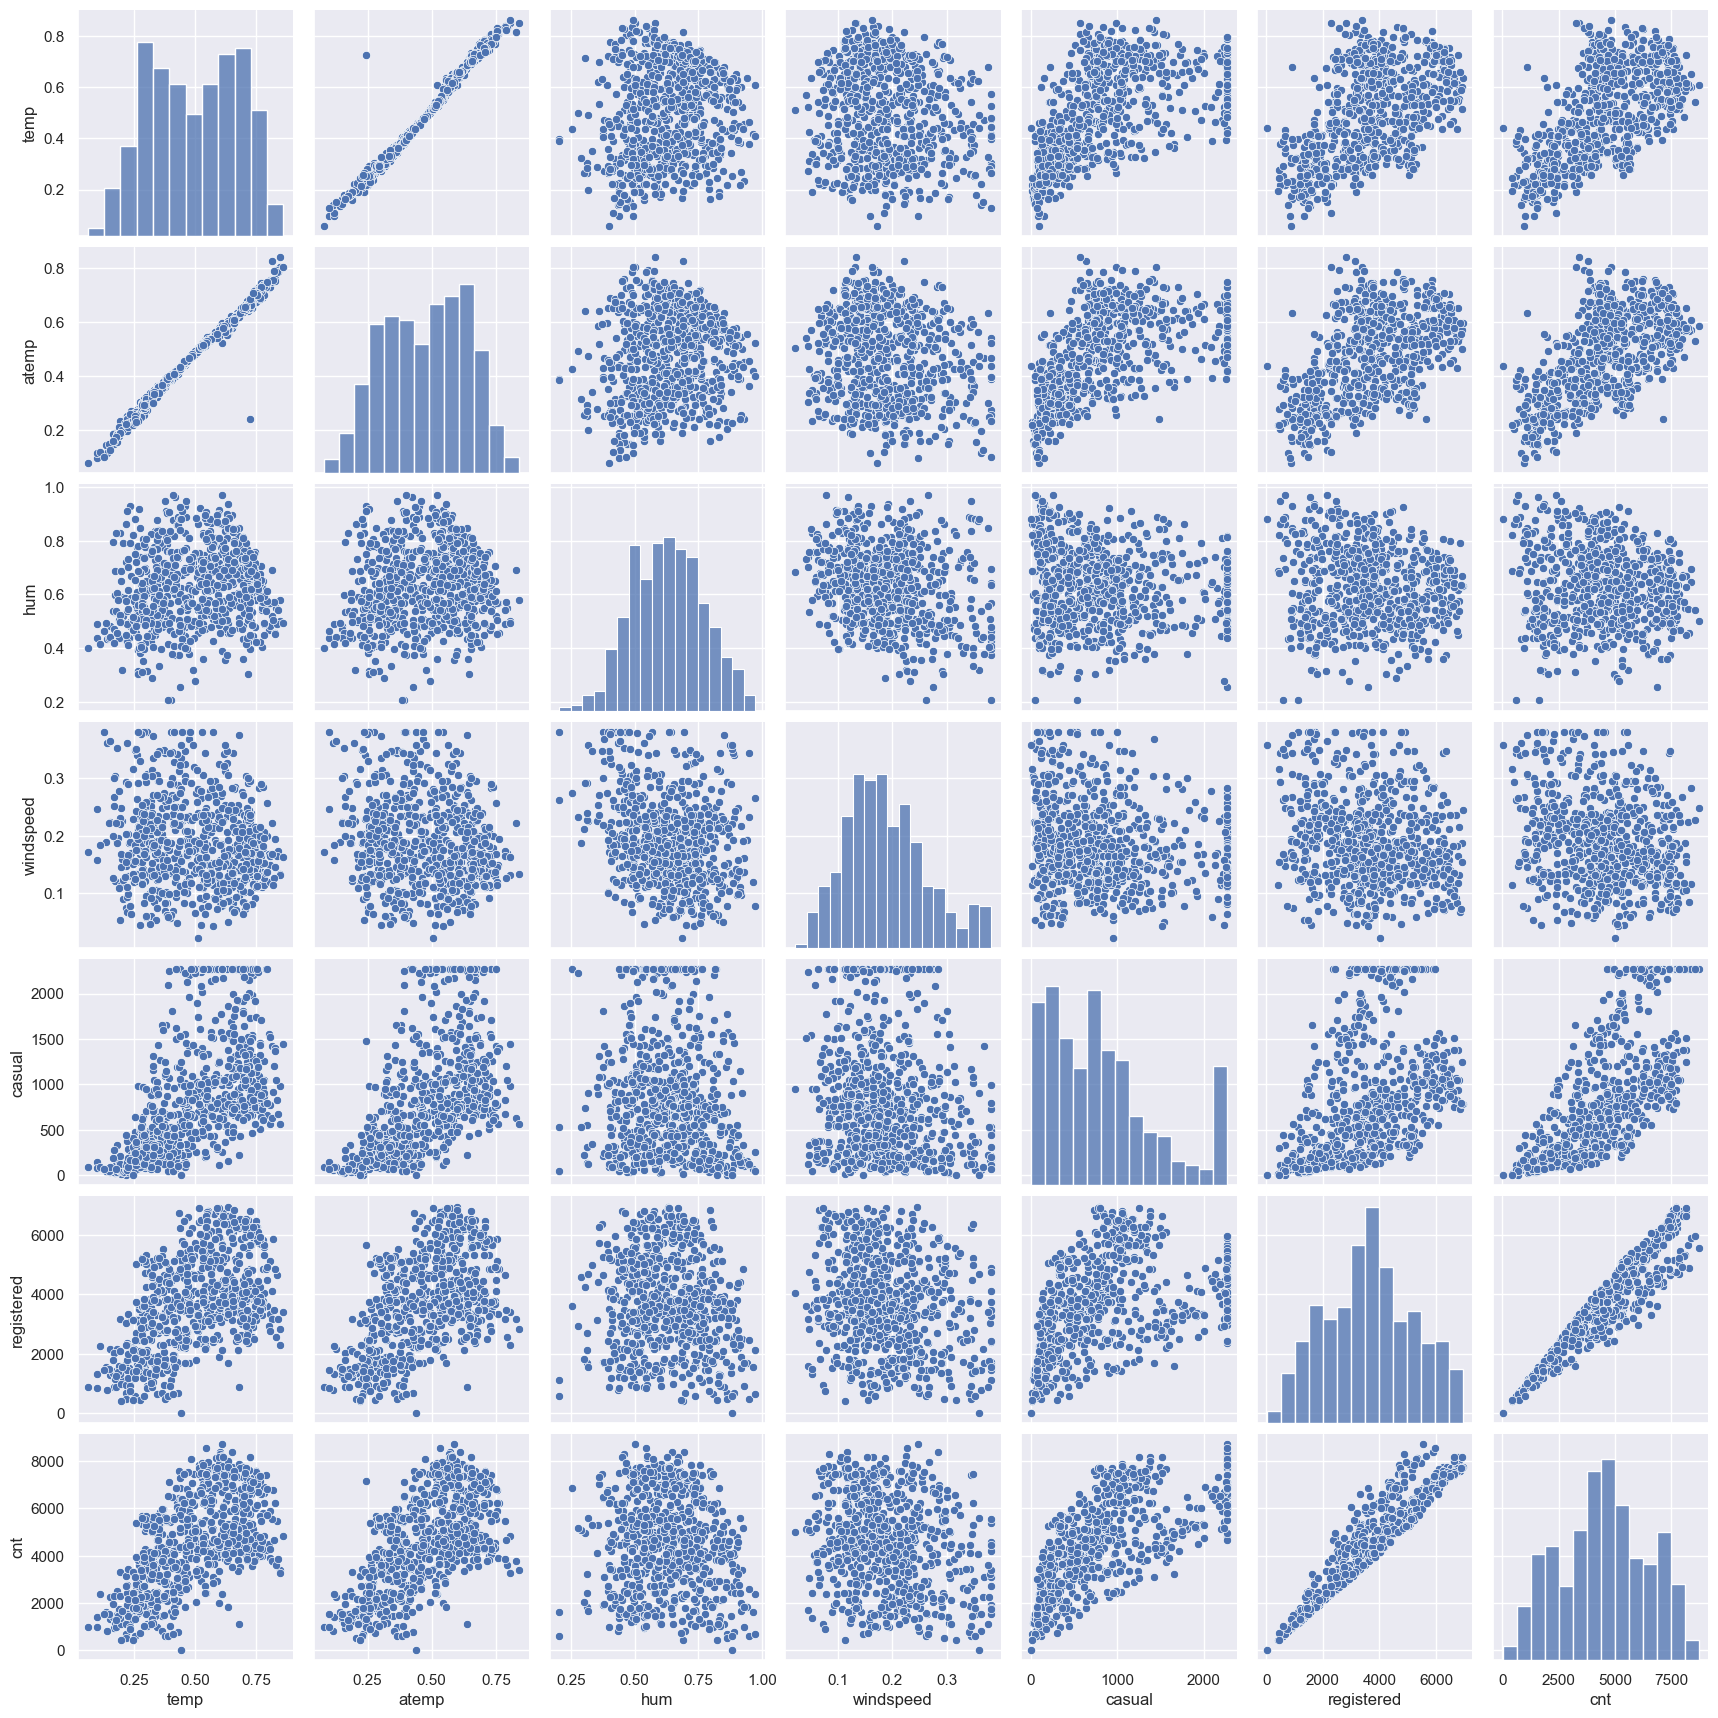

In [35]:
sns.set()
cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
sns.pairplot(df_day[cols])
plt.show();

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2